## 1. Import Libraries and Dataset

In [48]:
import pandas as pd
pd.set_option('display.max_columns', None)
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from lightgbm import LGBMClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_auc_score, classification_report, precision_recall_curve

In [8]:
df = pd.read_csv(r'customer_booking.csv', encoding='latin-1')

## 2. Data Preprocessing

### Data Exploration

#### Snapshot

In [9]:
df.head()

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
0,2,Internet,RoundTrip,262,19,7,Sat,AKLDEL,New Zealand,1,0,0,5.52,0
1,1,Internet,RoundTrip,112,20,3,Sat,AKLDEL,New Zealand,0,0,0,5.52,0
2,2,Internet,RoundTrip,243,22,17,Wed,AKLDEL,India,1,1,0,5.52,0
3,1,Internet,RoundTrip,96,31,4,Sat,AKLDEL,New Zealand,0,0,1,5.52,0
4,2,Internet,RoundTrip,68,22,15,Wed,AKLDEL,India,1,0,1,5.52,0


In [10]:
df.tail()

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
49995,2,Internet,RoundTrip,27,6,9,Sat,PERPNH,Australia,1,0,1,5.62,0
49996,1,Internet,RoundTrip,111,6,4,Sun,PERPNH,Australia,0,0,0,5.62,0
49997,1,Internet,RoundTrip,24,6,22,Sat,PERPNH,Australia,0,0,1,5.62,0
49998,1,Internet,RoundTrip,15,6,11,Mon,PERPNH,Australia,1,0,1,5.62,0
49999,1,Internet,RoundTrip,19,6,10,Thu,PERPNH,Australia,0,1,0,5.62,0


#### Check the Data Types

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   num_passengers         50000 non-null  int64  
 1   sales_channel          50000 non-null  object 
 2   trip_type              50000 non-null  object 
 3   purchase_lead          50000 non-null  int64  
 4   length_of_stay         50000 non-null  int64  
 5   flight_hour            50000 non-null  int64  
 6   flight_day             50000 non-null  object 
 7   route                  50000 non-null  object 
 8   booking_origin         50000 non-null  object 
 9   wants_extra_baggage    50000 non-null  int64  
 10  wants_preferred_seat   50000 non-null  int64  
 11  wants_in_flight_meals  50000 non-null  int64  
 12  flight_duration        50000 non-null  float64
 13  booking_complete       50000 non-null  int64  
dtypes: float64(1), int64(8), object(5)
memory usage: 5.3+ 

In [12]:
df.describe()

,num_passengers,purchase_lead,length_of_stay,flight_hour,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
count,50000.000000,50000.000000,50000.00000,50000.00000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,1.591240,84.940480,23.04456,9.06634,0.668780,0.296960,0.427140,7.277561,0.149560
std,1.020165,90.451378,33.88767,5.41266,0.470657,0.456923,0.494668,1.496863,0.356643
min,1.000000,0.000000,0.00000,0.00000,0.000000,0.000000,0.000000,4.670000,0.000000
25%,1.000000,21.000000,5.00000,5.00000,0.000000,0.000000,0.000000,5.620000,0.000000
50%,1.000000,51.000000,17.00000,9.00000,1.000000,0.000000,0.000000,7.570000,0.000000
75%,2.000000,115.000000,28.00000,13.00000,1.000000,1.000000,1.000000,8.830000,0.000000
max,9.000000,867.000000,778.00000,23.00000,1.000000,1.000000,1.000000,9.500000,1.000000


#### Pair Relationships

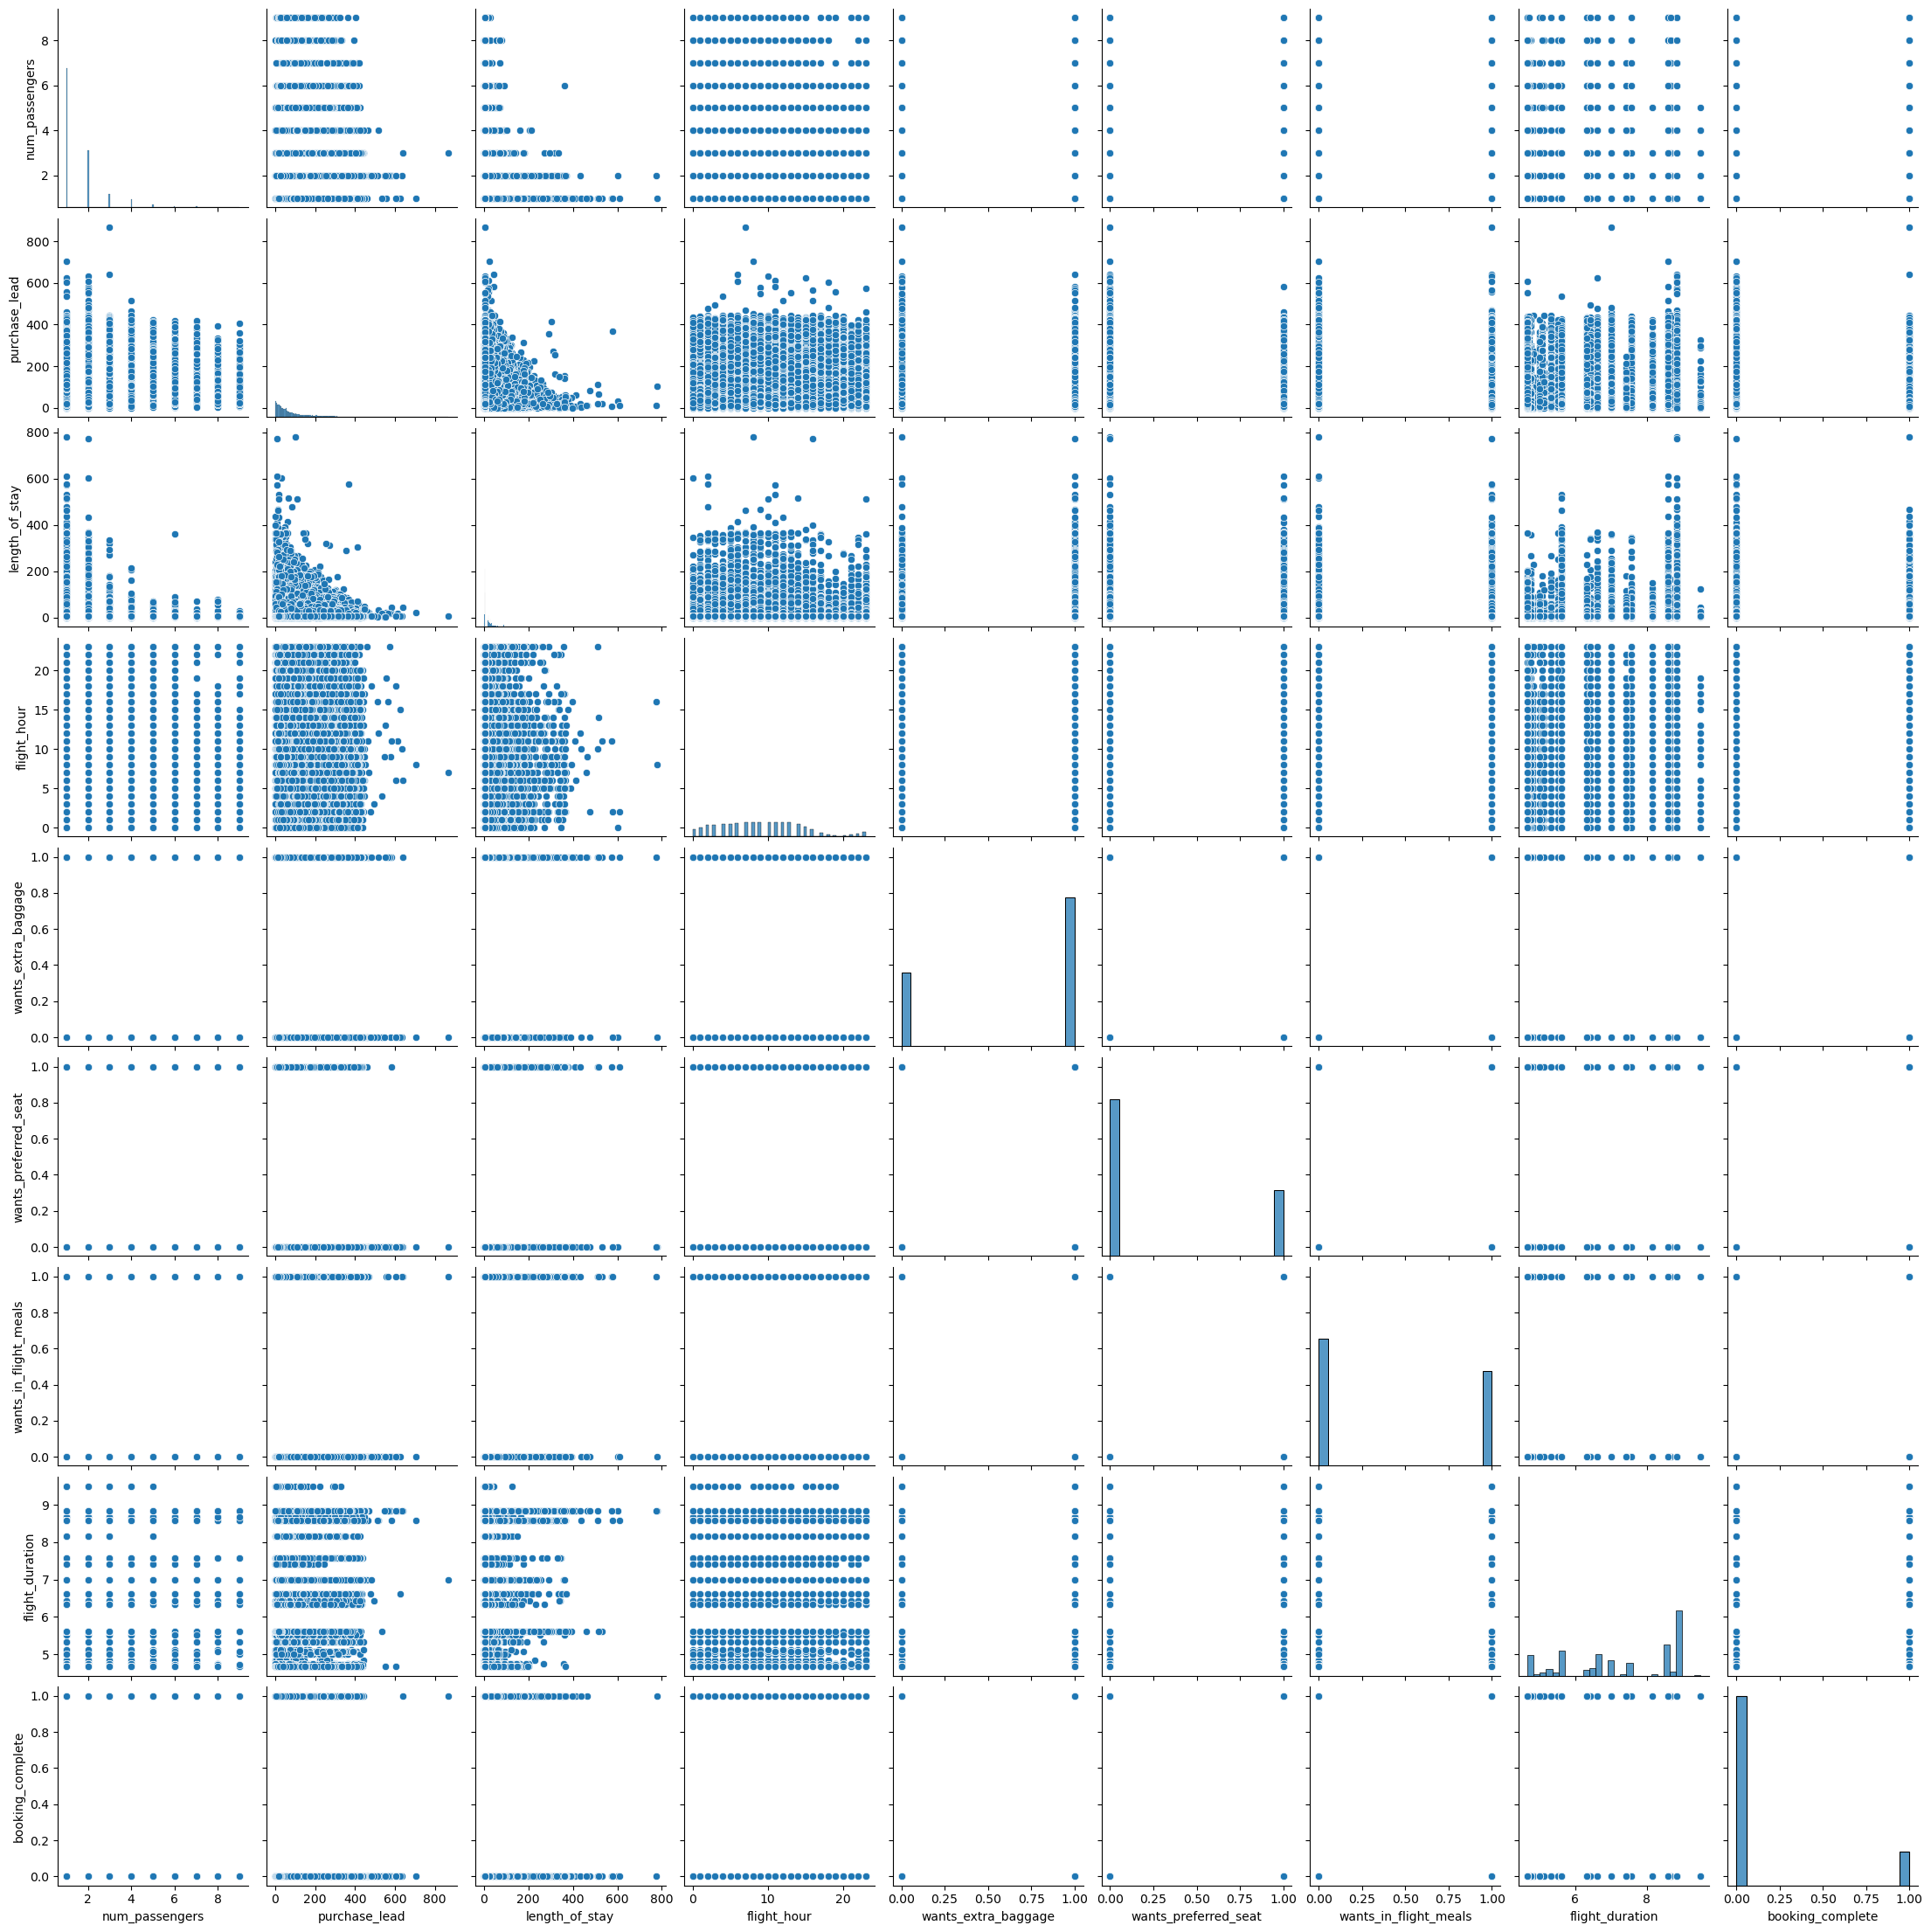

In [26]:
sns.pairplot(df)

## Data Preprocessing

#### check for null values

In [6]:
df.isnull().sum()

num_passengers           0
sales_channel            0
trip_type                0
purchase_lead            0
length_of_stay           0
flight_hour              0
flight_day               0
route                    0
booking_origin           0
wants_extra_baggage      0
wants_preferred_seat     0
wants_in_flight_meals    0
flight_duration          0
booking_complete         0
dtype: int64

#### check for mispellings

In [14]:
df.nunique()

num_passengers             9
sales_channel              2
trip_type                  3
purchase_lead            470
length_of_stay           335
flight_hour               24
flight_day                 7
route                    799
booking_origin           104
wants_extra_baggage        2
wants_preferred_seat       2
wants_in_flight_meals      2
flight_duration           21
booking_complete           2
dtype: int64

In [17]:
print(df['sales_channel'].unique())
print(df['trip_type'].unique())
print(df['flight_day'].unique())
print(df['booking_origin'].unique())

['Internet' 'Mobile']
['RoundTrip' 'CircleTrip' 'OneWay']
['Sat' 'Wed' 'Thu' 'Mon' 'Sun' 'Tue' 'Fri']
['New Zealand' 'India' 'United Kingdom' 'China' 'South Korea' 'Japan'
 'Malaysia' 'Singapore' 'Switzerland' 'Germany' 'Indonesia'
 'Czech Republic' 'Vietnam' 'Thailand' 'Spain' 'Romania' 'Ireland' 'Italy'
 'Slovakia' 'United Arab Emirates' 'Tonga' 'R\x82union' '(not set)'
 'Saudi Arabia' 'Netherlands' 'Qatar' 'Hong Kong' 'Philippines'
 'Sri Lanka' 'France' 'Croatia' 'United States' 'Laos' 'Hungary'
 'Portugal' 'Cyprus' 'Australia' 'Cambodia' 'Poland' 'Belgium' 'Oman'
 'Bangladesh' 'Kazakhstan' 'Brazil' 'Turkey' 'Kenya' 'Taiwan' 'Brunei'
 'Chile' 'Bulgaria' 'Ukraine' 'Denmark' 'Colombia' 'Iran' 'Bahrain'
 'Solomon Islands' 'Slovenia' 'Mauritius' 'Nepal' 'Russia' 'Kuwait'
 'Mexico' 'Sweden' 'Austria' 'Lebanon' 'Jordan' 'Greece' 'Mongolia'
 'Canada' 'Tanzania' 'Peru' 'Timor-Leste' 'Argentina' 'New Caledonia'
 'Macau' 'Myanmar (Burma)' 'Norway' 'Panama' 'Bhutan' 'Norfolk Island'
 'Finland'

In [18]:
# Replace Mispellings
df['booking_origin'] = df['booking_origin'].replace('R\x82union','Reunion')

In [19]:
df

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
0,2,Internet,RoundTrip,262,19,7,Sat,AKLDEL,New Zealand,1,0,0,5.52,0
1,1,Internet,RoundTrip,112,20,3,Sat,AKLDEL,New Zealand,0,0,0,5.52,0
2,2,Internet,RoundTrip,243,22,17,Wed,AKLDEL,India,1,1,0,5.52,0
3,1,Internet,RoundTrip,96,31,4,Sat,AKLDEL,New Zealand,0,0,1,5.52,0
4,2,Internet,RoundTrip,68,22,15,Wed,AKLDEL,India,1,0,1,5.52,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,2,Internet,RoundTrip,27,6,9,Sat,PERPNH,Australia,1,0,1,5.62,0
49996,1,Internet,RoundTrip,111,6,4,Sun,PERPNH,Australia,0,0,0,5.62,0
49997,1,Internet,RoundTrip,24,6,22,Sat,PERPNH,Australia,0,0,1,5.62,0
49998,1,Internet,RoundTrip,15,6,11,Mon,PERPNH,Australia,1,0,1,5.62,0


#### Remove Duplicates

In [21]:
print("Original Shape:" + str(df.shape))
print("Original Shape:" + str(df.drop_duplicates().shape))

Original Shape:(50000, 14)
Original Shape:(49281, 14)


In [22]:
df = df.drop_duplicates()

In [4]:
route_counts = df['route'].value_counts()
routes_over_x = route_counts[route_counts > 100]
df[df['route'].isin(routes_over_x.index)]

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
82,1,Internet,RoundTrip,15,31,17,Mon,AKLKUL,Malaysia,0,0,0,8.83,1
83,1,Internet,RoundTrip,31,274,10,Tue,AKLKUL,Malaysia,1,0,0,8.83,0
84,1,Internet,RoundTrip,316,35,16,Tue,AKLKUL,Malaysia,1,0,0,8.83,0
85,2,Internet,RoundTrip,232,17,3,Tue,AKLKUL,Malaysia,1,1,1,8.83,0
86,1,Internet,RoundTrip,156,19,14,Mon,AKLKUL,Malaysia,1,0,0,8.83,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,2,Internet,RoundTrip,27,6,9,Sat,PERPNH,Australia,1,0,1,5.62,0
49996,1,Internet,RoundTrip,111,6,4,Sun,PERPNH,Australia,0,0,0,5.62,0
49997,1,Internet,RoundTrip,24,6,22,Sat,PERPNH,Australia,0,0,1,5.62,0
49998,1,Internet,RoundTrip,15,6,11,Mon,PERPNH,Australia,1,0,1,5.62,0


### Feature Selection

#### Dummy Variables

In [33]:
df2 = df.copy()

In [34]:
df2 = pd.get_dummies(df2,columns=["sales_channel","trip_type",'flight_day','booking_origin'],drop_first=True)

df2

,num_passengers,purchase_lead,length_of_stay,flight_hour,route,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete,sales_channel_Mobile,trip_type_OneWay,trip_type_RoundTrip,flight_day_Mon,flight_day_Sat,flight_day_Sun,flight_day_Thu,flight_day_Tue,flight_day_Wed,booking_origin_Afghanistan,booking_origin_Algeria,booking_origin_Argentina,booking_origin_Australia,booking_origin_Austria,booking_origin_Bahrain,booking_origin_Bangladesh,booking_origin_Belarus,booking_origin_Belgium,booking_origin_Bhutan,booking_origin_Brazil,booking_origin_Brunei,booking_origin_Bulgaria,booking_origin_Cambodia,booking_origin_Canada,booking_origin_Chile,booking_origin_China,booking_origin_Colombia,booking_origin_Croatia,booking_origin_Cyprus,booking_origin_Czech Republic,booking_origin_Czechia,booking_origin_Denmark,booking_origin_Egypt,booking_origin_Estonia,booking_origin_Finland,booking_origin_France,booking_origin_Germany,booking_origin_Ghana,booking_origin_Gibraltar,booking_origin_Greece,booking_origin_Guam,booking_origin_Guatemala,booking_origin_Hong Kong,booking_origin_Hungary,booking_origin_India,booking_origin_Indonesia,booking_origin_Iran,booking_origin_Iraq,booking_origin_Ireland,booking_origin_Israel,booking_origin_Italy,booking_origin_Japan,booking_origin_Jordan,booking_origin_Kazakhstan,booking_origin_Kenya,booking_origin_Kuwait,booking_origin_Laos,booking_origin_Lebanon,booking_origin_Macau,booking_origin_Malaysia,booking_origin_Maldives,booking_origin_Malta,booking_origin_Mauritius,booking_origin_Mexico,booking_origin_Mongolia,booking_origin_Myanmar (Burma),booking_origin_Nepal,booking_origin_Netherlands,booking_origin_New Caledonia,booking_origin_New Zealand,booking_origin_Nicaragua,booking_origin_Norfolk Island,booking_origin_Norway,booking_origin_Oman,booking_origin_Pakistan,booking_origin_Panama,booking_origin_Papua New Guinea,booking_origin_Paraguay,booking_origin_Peru,booking_origin_Philippines,booking_origin_Poland,booking_origin_Portugal,booking_origin_Qatar,booking_origin_Reunion,booking_origin_Romania,booking_origin_Russia,booking_origin_Saudi Arabia,booking_origin_Seychelles,booking_origin_Singapore,booking_origin_Slovakia,booking_origin_Slovenia,booking_origin_Solomon Islands,booking_origin_South Africa,booking_origin_South Korea,booking_origin_Spain,booking_origin_Sri Lanka,booking_origin_Svalbard & Jan Mayen,booking_origin_Sweden,booking_origin_Switzerland,booking_origin_Taiwan,booking_origin_Tanzania,booking_origin_Thailand,booking_origin_Timor-Leste,booking_origin_Tonga,booking_origin_Tunisia,booking_origin_Turkey,booking_origin_Ukraine,booking_origin_United Arab Emirates,booking_origin_United Kingdom,booking_origin_United States,booking_origin_Vanuatu,booking_origin_Vietnam
0,2,262,19,7,AKLDEL,1,0,0,5.52,0,False,False,True,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,1,112,20,3,AKLDEL,0,0,0,5.52,0,False,False,True,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,

### Train Test Split

#### set target variables

In [41]:
y = df2['wants_extra_baggage']
X = df2.drop(['wants_extra_baggage', 'route'],axis=1)

#### train test split 80%

In [42]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.80, random_state=42)

### Model Selection

#### Logistic Model

In [43]:
# Initialize model
logistic_model = LogisticRegression()

# Train model
logistic_model.fit(X_train, y_train)

# Prediction
logistic_pred = logistic_model.predict(X_test)

#### Random Forest Classifier

In [44]:
# Initialize model
rf_model = RandomForestClassifier()

# Train model
rf_model.fit(X_train, y_train)

# Prediction
rf_pred = rf_model.predict(X_test)

#### LightGBM Classifier

In [46]:
# Initialize model
lgbm_model = LGBMClassifier()

# Train model
lgbm_model.fit(X_train, y_train)

# Prediction
lgbm_pred = lgbm_model.predict(X_test)

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 26403, number of negative: 13021
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001685 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 651
[LightGBM] [Info] Number of data points in the train set: 39424, number of used features: 51
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.669719 -> initscore=0.706914
[LightGBM] [Info] Start training from score 0.706914


### Evaluation

Model: Logistic Regression
Accuracy: 0.7116769808258091
Precision: 0.6777817816113696
Recall: 0.629745116261434
F1 Score: 0.6356355282750095
Confusion Matrix:
[[1256 2073]
 [ 769 5759]]
Classification Report:
              precision    recall  f1-score   support

           0       0.62      0.38      0.47      3329
           1       0.74      0.88      0.80      6528

    accuracy                           0.71      9857
   macro avg       0.68      0.63      0.64      9857
weighted avg       0.70      0.71      0.69      9857

ROC AUC Score: 0.629745116261434


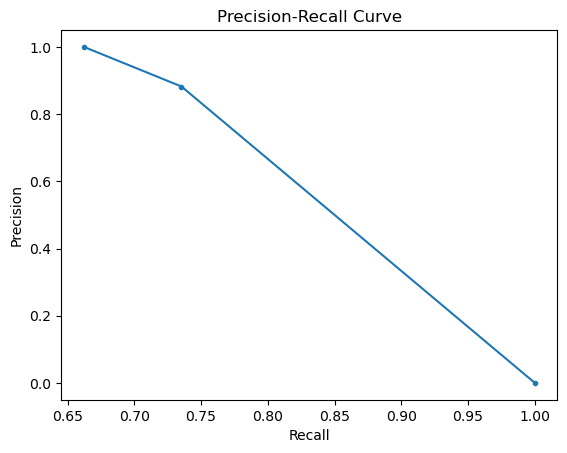



Model: Random Forest
Accuracy: 0.7126914882824389
Precision: 0.6753582081897809
Recall: 0.6475867386794009
F1 Score: 0.654371797416657
Confusion Matrix:
[[1488 1841]
 [ 991 5537]]
Classification Report:
              precision    recall  f1-score   support

           0       0.60      0.45      0.51      3329
           1       0.75      0.85      0.80      6528

    accuracy                           0.71      9857
   macro avg       0.68      0.65      0.65      9857
weighted avg       0.70      0.71      0.70      9857

ROC AUC Score: 0.6475867386794009


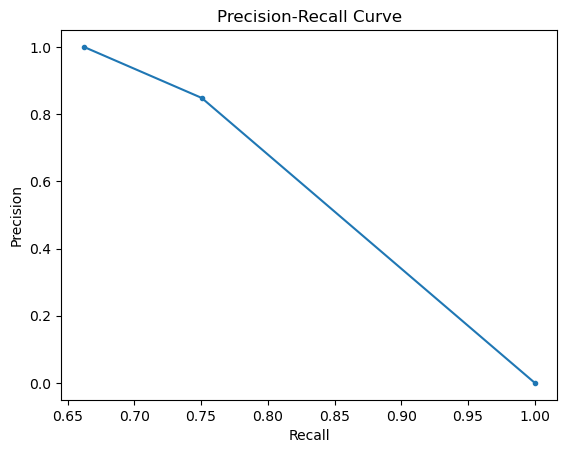



Model: LightGBM
Accuracy: 0.7353150045652835
Precision: 0.7072609776813581
Recall: 0.6677582971833973
F1 Score: 0.6770088408092302
Confusion Matrix:
[[1530 1799]
 [ 810 5718]]
Classification Report:
              precision    recall  f1-score   support

           0       0.65      0.46      0.54      3329
           1       0.76      0.88      0.81      6528

    accuracy                           0.74      9857
   macro avg       0.71      0.67      0.68      9857
weighted avg       0.72      0.74      0.72      9857

ROC AUC Score: 0.6677582971833973


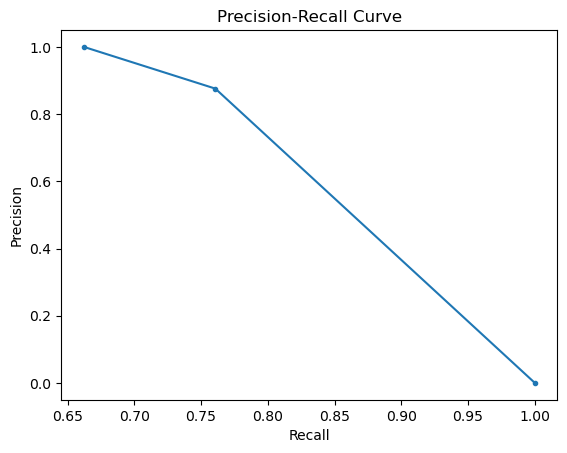

In [49]:
# Evaluation
models = {
    "Logistic Regression": logistic_pred,
    "Random Forest": rf_pred,
    "LightGBM": lgbm_pred
}

for name, pred in models.items():
    print("Model:", name)
    print("Accuracy:", accuracy_score(y_test, pred))
    print("Precision:", precision_score(y_test, pred, average='macro'))
    print("Recall:", recall_score(y_test, pred, average='macro'))
    print("F1 Score:", f1_score(y_test, pred, average='macro'))
    print("Confusion Matrix:")
    print(confusion_matrix(y_test, pred))
    print("Classification Report:")
    print(classification_report(y_test, pred))

    # ROC AUC Curve (for binary classification tasks)
    try:
        roc_auc = roc_auc_score(y_test, pred, average='macro', multi_class='ovr')
        print("ROC AUC Score:", roc_auc)
    except ValueError:
        pass
    
    # Precision-Recall Curve (for binary classification tasks)
    try:
        precision_recall = precision_recall_curve(y_test, pred, pos_label=1)
        plt.figure()
        plt.plot(precision_recall[0], precision_recall[1], marker='.')
        plt.xlabel('Recall')
        plt.ylabel('Precision')
        plt.title('Precision-Recall Curve')
        plt.show()
    except ValueError:
        pass

    print("\n")